In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import scipy
%matplotlib inline
from sklearn.cluster import KMeans

# 1.Load the file “zoo.data” and look at the info and first five rows. 

In [38]:
df=pd.read_csv('c:\edureka\zoo.csv',index_col = ["animal_name"])
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [39]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 17 columns):
hair          101 non-null int64
feathers      101 non-null int64
eggs          101 non-null int64
milk          101 non-null int64
airborne      101 non-null int64
aquatic       101 non-null int64
predator      101 non-null int64
toothed       101 non-null int64
backbone      101 non-null int64
breathes      101 non-null int64
venomous      101 non-null int64
fins          101 non-null int64
legs          101 non-null int64
tail          101 non-null int64
domestic      101 non-null int64
catsize       101 non-null int64
class_type    101 non-null int64
dtypes: int64(17)
memory usage: 14.2+ KB


In [41]:
df.shape

(101, 17)

In [43]:
#df['animal_name'].value_counts()

# 2.Find out the unique number of high level class.

In [44]:
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [45]:
df['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [46]:
len(df['class_type'].unique())

7

In [21]:
df=df.drop(['animal_name'],axis=1)

In [54]:
X=df.drop(['class_type'],axis=1)
y=df['class_type']

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 16 columns):
hair        101 non-null int64
feathers    101 non-null int64
eggs        101 non-null int64
milk        101 non-null int64
airborne    101 non-null int64
aquatic     101 non-null int64
predator    101 non-null int64
toothed     101 non-null int64
backbone    101 non-null int64
breathes    101 non-null int64
venomous    101 non-null int64
fins        101 non-null int64
legs        101 non-null int64
tail        101 non-null int64
domestic    101 non-null int64
catsize     101 non-null int64
dtypes: int64(16)
memory usage: 18.4+ KB


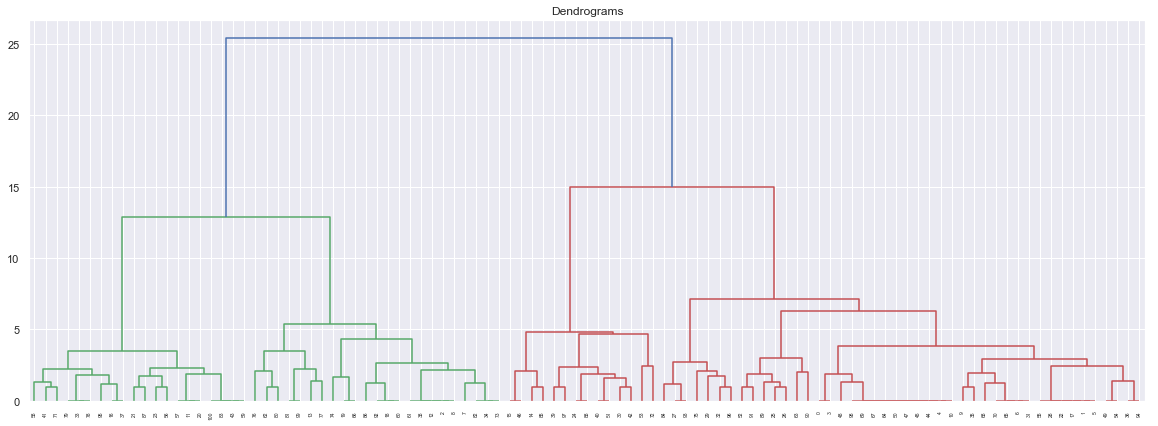

In [56]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))  

plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(X, method='ward'))

# 3.Use the 16-intermediate feature and perform an agglomerative clustering.

In [58]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  

cluster.fit(X)
labels = cluster.labels_

In [59]:
print(labels) 

[1 1 2 1 1 1 1 2 2 1 1 3 2 6 0 0 3 1 2 2 3 3 1 3 0 5 5 4 1 4 0 1 4 3 2 1 1
 3 2 0 0 3 0 3 1 1 0 1 1 1 1 0 5 0 1 1 3 3 3 3 2 2 6 5 1 1 2 1 1 1 1 3 0 2
 2 4 6 6 3 3 6 6 2 3 4 0 2 3 0 5 5 5 2 4 1 3 4 0 1 6 3]


In [60]:
y_pred=cluster.fit_predict(X)
y_pred

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int64)

# 4.Compute the mean squared error by comparing the actual class and predicted high level class.

In [61]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y,y_pred))

7.673267326732673
